# Audible Best Sellers

## Overview

Audible.com offers audible books and provides a best seller list on the website.
The best seller list was scraped with selenium on 07/28/17, 07/31/17 and 08/01/17.
The gathered data is analysed in the following.

In [692]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

# Data Preperation

The three datasets are loaded and combined in a single one where eacht title only appers once.

In [693]:
bs1 = pd.read_csv("bestsellers_2017-07-28.csv")
bs2 = pd.read_csv("bestsellers_2017-07-31.csv")
bs3 = pd.read_csv("bestsellers_2017-08-01.csv")
bs1["scrap_date"] = "2017-07-28"
bs2["scrap_date"] = "2017-07-31"
bs3["scrap_date"] = "2017-08-01"

In [694]:
# union the three beste seller lists to a single one
bs = pd.DataFrame(bs1)
bs2_newTitles = set(bs2["title"]) -  set(bs["title"])
bs = bs.append(bs2.loc[bs2["title"].isin(bs2_newTitles)])
bs3_newTitles = set(bs3["title"]) -  set(bs["title"])
bs = bs.append(bs3.loc[bs3["title"].isin(bs3_newTitles)])
bs.to_csv("bestsellers.csv")

There are several "best sellers" for free, they are dropped.

In [695]:
# best sellers with price == 0
bs.loc[(bs["price"] == 0.0)]["title"]


0             The Butterfly Effect with Jon Ronson
52                          Ep. 1: I've Had Better
51        Ep. 9: Trauma Doesn't Like to Be Touched
53                              Ep. 8: Sexlessness
55                Ep. 10: I Can't Give You a Child
59    Ep. 6: There's You There's Me and There's Us
56                         Ep. 2: Motherless Women
Name: title, dtype: object

In [696]:
# remove bests sellers with price 0
bs = bs.loc[(bs["price"] != 0.0)]
print(bs.shape[0])

73


# Category

Analying the best sellers categories.

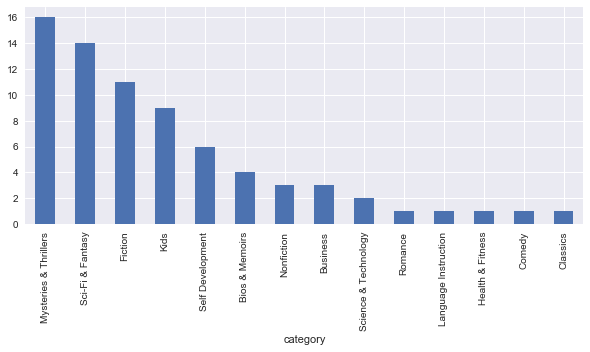

In [697]:
plt.figure(figsize=(10,4))
bs.groupby('category')["title"].count().sort_values(ascending=False).plot.bar()

Add an additional column to distinguish "light fiction" and other books.

In [698]:
light_fiction = ['Mysteries & Thrillers', 'Sci-Fi & Fantasy', 'Comedy', 'Fiction', 'Romance', 'Health & Fitness', 'Kids']
bs["classification"] = bs["category"].apply(lambda x: "light fiction" if x in light_fiction else "other")

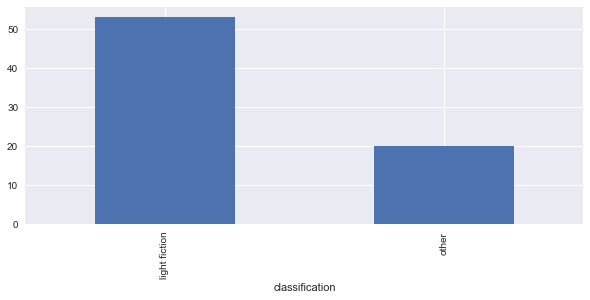

In [699]:
plt.figure(figsize=(10,4))
bs.groupby('classification')["title"].count().sort_values(ascending=False).plot.bar()

# Publisher

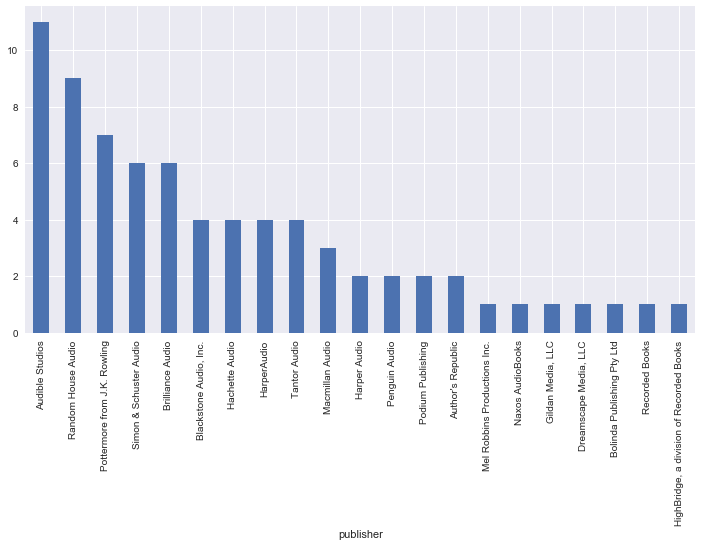

In [700]:
plt.figure(figsize=(12,6))
bs.groupby('publisher')["title"].count().sort_values(ascending=False).plot.bar()

# Narrated By / Speaker

In [701]:
plt.figure(figsize=(12,6))
bs[['narrated_by', "title"]].groupby('narrated_by').count().sort_values(ascending=False, by="title").head(7)

,title
narrated_by,
Jim Dale,7
Saskia Maarleveld,2
George Guidall,2
Roy Dotrice,2
Adam Boyce,2
Katherine Kellgren,1
Katherine Moennig,1


In [702]:
bs.loc[bs['narrated_by'].isin(["Jim Dale", "Saskia Maarleveld", "George Guidall", "Roy Dotrice"])][['narrated_by', "title", "series"]].\
sort_values(by="narrated_by")

,narrated_by,title,series
5,George Guidall,The Dark Tower I: The Gunslinger,"Series: The Dark Tower, Book 1"
43,George Guidall,House of Spies: A Novel,"Series: Gabriel Allon, Book 17"
9,Jim Dale,"Harry Potter and the Sorcerer's Stone, Book 1","Series: Harry Potter, Book 1"
21,Jim Dale,"Harry Potter and the Chamber of Secrets, Book 2","Series: Harry Potter, Book 2"
25,Jim Dale,"Harry Potter and the Prisoner of Azkaban, Book 3","Series: Harry Potter, Book 3"
28,Jim Dale,"Harry Potter and the Order of the Phoenix, Book 5","Series: Harry Potter, Book 5"
29,Jim Dale,"Harry Potter and the Goblet of Fire, Book 4","Series: Harry Potter, Book 4"
35,Jim Dale,"Harry Potter and the Half-Blood Prince, Book 6","Series: Harry Potter, Book 6"
36,Jim Dale,"Harry Potter and the Deathly Hallows, Book 7","Series: Harry Potter, Book 7"
6,Roy Dotrice,"A Game of Thrones: A Song of Ice and Fire, Book 1","Series: Song of Ice and Fire, Book 1"


# Length and Price

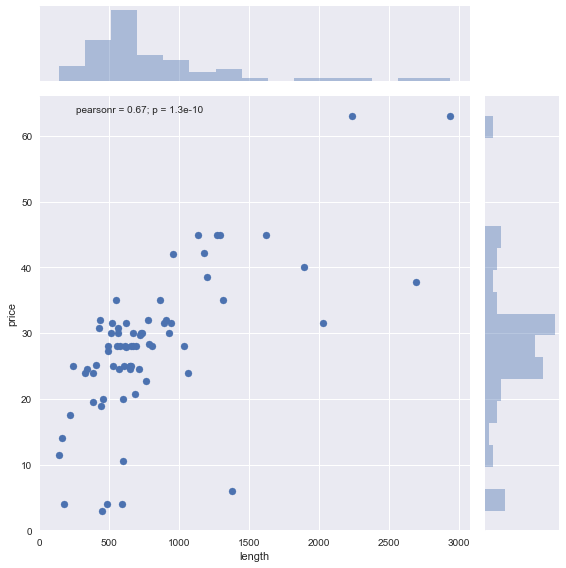

In [703]:
import seaborn as sns

sns.jointplot(bs['length'], bs['price'], size=8)

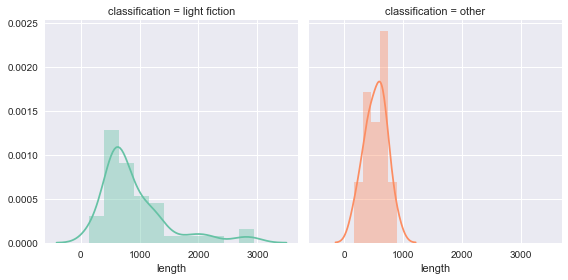

In [704]:
tipsGrid = sns.FacetGrid(bs, col='classification', hue='classification', palette="Set2", size=4)
tipsGrid.map(sns.distplot,'length')

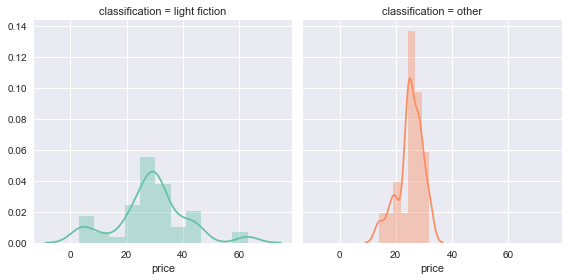

In [705]:
tipsGrid = sns.FacetGrid(bs, col='classification', hue='classification', palette="Set2", size=4)
tipsGrid.map(sns.distplot,'price')

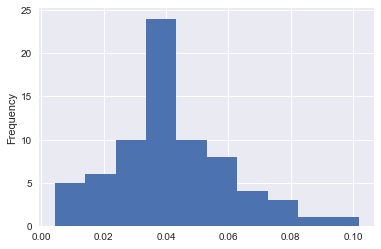

In [706]:
bs["price_per_min"] = bs["price"] / bs["length"]
bs["price_per_min"].plot.hist()

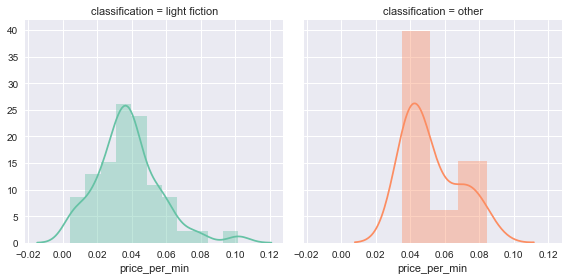

In [707]:
tipsGrid = sns.FacetGrid(bs, col='classification', hue='classification', palette="Set2", size=4)
tipsGrid.map(sns.distplot,'price_per_min')

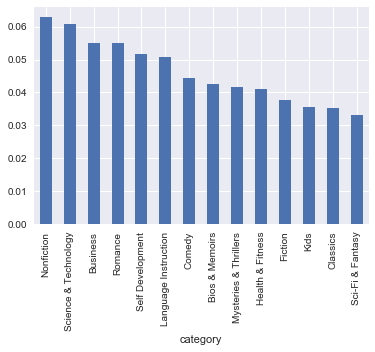

In [708]:
bs.groupby("category")["price_per_min"].mean().sort_values(ascending=False).plot.bar()

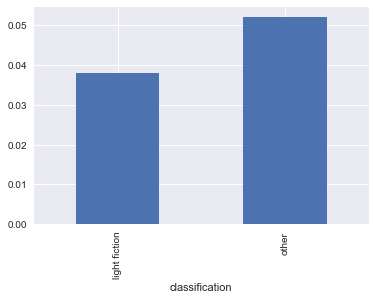

In [709]:
bs.groupby("classification")["price_per_min"].mean().sort_values(ascending=True).plot.bar()

# Series

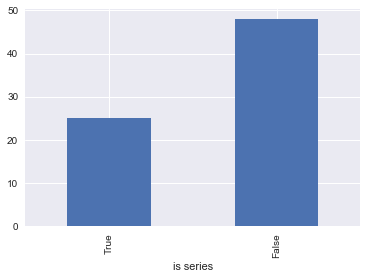

In [710]:
bs["is_series"] = ~bs["series"].isnull()
bs.groupby('is_series')["title"].count().sort_values(ascending=True).plot.bar()
plt.xlabel('is series')

In [711]:
print("Number of series best sellers: " + str(np.sum(bs["is_series"])))
print(bs.loc[bs["is_series"]][["series"]])

Number of series best sellers: 25
                                            series
5                   Series: The Dark Tower, Book 1
6             Series: Song of Ice and Fire, Book 1
9                     Series: Harry Potter, Book 1
15  Series: The X-Files (Audible Original), Book 1
17                       Series: Bobiverse, Book 3
20                      Series: Star Wars, Book 16
21                    Series: Harry Potter, Book 2
25                    Series: Harry Potter, Book 3
27     Series: Legends of the First Empire, Book 2
28                    Series: Harry Potter, Book 5
29                    Series: Harry Potter, Book 4
31            Series: Song of Ice and Fire, Book 2
32                  Series: Monster Hunter, Book 6
34                 Series: Stillhouse Lake, Book 1
35                    Series: Harry Potter, Book 6
36                    Series: Harry Potter, Book 7
42              Series: Stormlight Archive, Book 3
43                  Series: Gabriel Allon, Book 

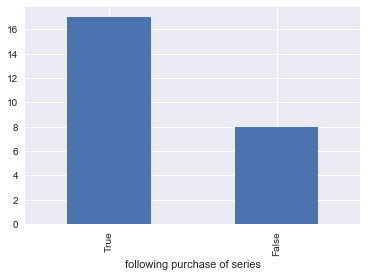

In [712]:
# follow up books 
import re
bs["series_following_purchase"] = bs["series"].apply(lambda s: str(type(s))=="<class 'str'>" and int(re.search("Book ([0-9]+)", s).group(1))!=1)
np.sum(bs["series_following_purchase"])
bs.loc[bs["is_series"]].groupby("series_following_purchase")["series_following_purchase"].count().sort_values(ascending=False).plot.bar()
plt.xlabel('following purchase of series')

Remove the follogin purchases from the data frame.

In [713]:
# remove following purchases
bs = bs.loc[~bs["series_following_purchase"]]


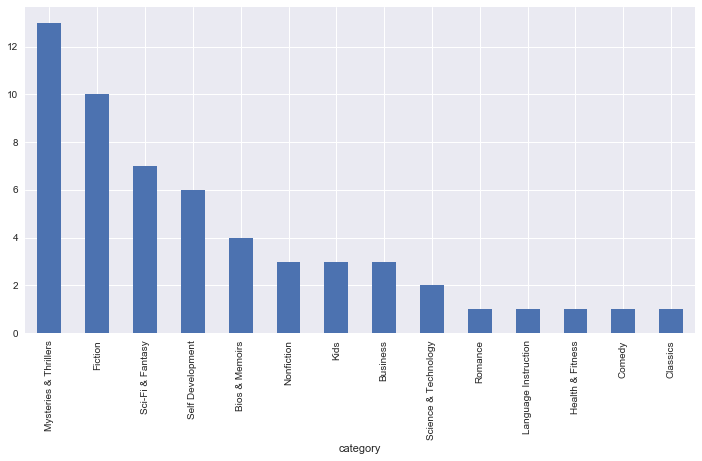

In [714]:
plt.figure(figsize=(12,6))
bs.groupby('category')["title"].count().sort_values(ascending=False).plot.bar()

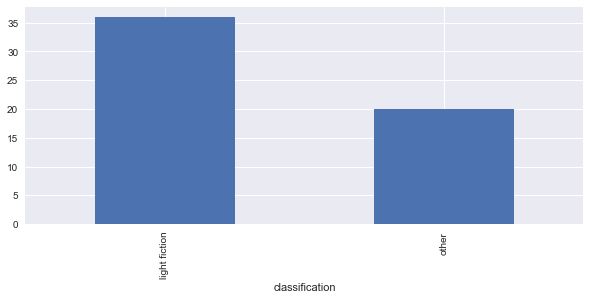

In [715]:
plt.figure(figsize=(10,4))
bs.groupby('classification')["title"].count().sort_values(ascending=False).plot.bar()

# Audible Raitings vs Amazon Ratings

In addition to the audible rating, the amazon book rating is also provided.
https://www.audible.com/pd/Sci-Fi-Fantasy/Not-Alone-Audiobook/B01JQGTYKA?ref_=a_adblbests_c2_4_t

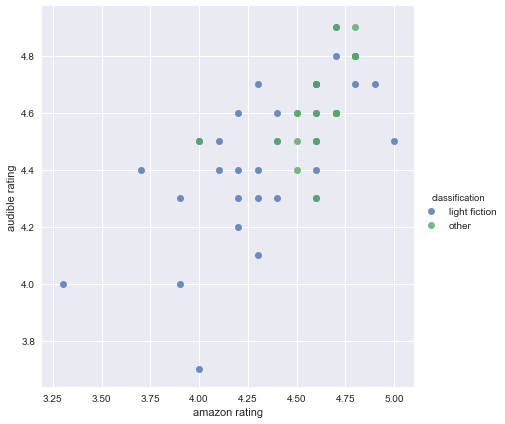

In [716]:
ax=sns.lmplot('amazon.rating.overall.value', 'adbl.rating.overall.value', data=bs, \
           hue='classification', fit_reg=False, size=6)
ax.set(xlabel='amazon rating', ylabel='audible rating')


In [717]:
bs.loc[(bs["adbl.rating.overall.value"] < 4) | (bs["amazon.rating.overall.value"] < 3.5)]\
[["title", "authors", "adbl.rating.overall.value", "amazon.rating.overall.value", "adbl.rating.overall.count", "amazon.rating.overall.count"]]

,title,authors,adbl.rating.overall.value,amazon.rating.overall.value,adbl.rating.overall.count,amazon.rating.overall.count
54,Into the Water,Paula Hawkins,4.0,3.3,5649.0,1046.0
49,Afterlife,Marcus Sakey,3.7,4.0,67.0,144.0


In [718]:
bs.groupby("classification")["amazon.rating.overall.value", "adbl.rating.overall.value"].mean()

,amazon.rating.overall.value,adbl.rating.overall.value
classification,,
light fiction,4.368571,4.467647
other,4.560000,4.605263


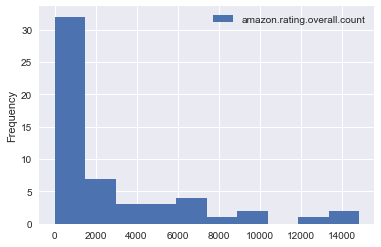

In [719]:
plt.figure(figsize=(12,8))
bs[["amazon.rating.overall.count"]].plot.hist()

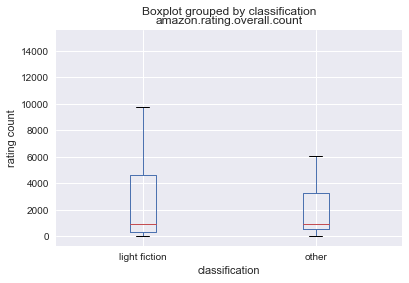

In [720]:
plt.figure(figsize=(12,6))
bs.boxplot(by='classification', column='amazon.rating.overall.count')
plt.ylabel('rating count')

In [721]:
bs[["classification", "amazon.rating.overall.count"]].groupby("classification").agg(["min", "mean", "max"])

amazon.rating.overall.count                      
                                       min         mean      max
classification                                                  
light fiction                          6.0  3096.142857  14847.0
other                                 22.0  2135.700000   7738.0

In [722]:
bs.loc[bs["amazon.rating.overall.count"]<50][["title", "series"]]

,title,series
15,The X-Files: Cold Cases,"Series: The X-Files (Audible Original), Book 1"
19,The Horologicon: A Day's Jaunt Through the Los...,NaN
50,Tumtum and Nutmeg,NaN
1,Scores: How I Opened the Hottest Strip Club in...,NaN
0,Everything You Told Me,NaN
58,The Big Lie: Exposing the Nazi Roots of the Am...,NaN
59,Crime Scene: A Novel,NaN
